In [95]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
df=pd.read_csv('D:\\AI_DataScience\\Data\\toyota.csv')

In [97]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0
...,...,...,...,...,...,...,...,...,...
6733,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0
6734,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3
6735,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4
6736,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [99]:
X=df.drop('price',axis=1)
y=df['price']

In [100]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   transmission  6738 non-null   object 
 3   mileage       6738 non-null   int64  
 4   fuelType      6738 non-null   object 
 5   tax           6738 non-null   int64  
 6   mpg           6738 non-null   float64
 7   engineSize    6738 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 421.3+ KB


In [101]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 6738 entries, 0 to 6737
Series name: price
Non-Null Count  Dtype
--------------  -----
6738 non-null   int64
dtypes: int64(1)
memory usage: 52.8 KB


In [102]:
X=pd.get_dummies(X,columns=['model'],drop_first=True)

In [103]:
X=X.replace({True:1,False:0})

C:\Users\Asus\AppData\Local\Temp\ipykernel_17716\1024693661.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X=X.replace({True:1,False:0})


In [104]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  6738 non-null   int64  
 1   transmission          6738 non-null   object 
 2   mileage               6738 non-null   int64  
 3   fuelType              6738 non-null   object 
 4   tax                   6738 non-null   int64  
 5   mpg                   6738 non-null   float64
 6   engineSize            6738 non-null   float64
 7   model_ Avensis        6738 non-null   int64  
 8   model_ Aygo           6738 non-null   int64  
 9   model_ C-HR           6738 non-null   int64  
 10  model_ Camry          6738 non-null   int64  
 11  model_ Corolla        6738 non-null   int64  
 12  model_ GT86           6738 non-null   int64  
 13  model_ Hilux          6738 non-null   int64  
 14  model_ IQ             6738 non-null   int64  
 15  model_ Land Cruiser  

In [105]:
categogy=['transmission','fuelType']

In [106]:
for col in categogy:
    X[col]=X[col].astype('category').cat.codes

In [107]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  6738 non-null   int64  
 1   transmission          6738 non-null   int8   
 2   mileage               6738 non-null   int64  
 3   fuelType              6738 non-null   int8   
 4   tax                   6738 non-null   int64  
 5   mpg                   6738 non-null   float64
 6   engineSize            6738 non-null   float64
 7   model_ Avensis        6738 non-null   int64  
 8   model_ Aygo           6738 non-null   int64  
 9   model_ C-HR           6738 non-null   int64  
 10  model_ Camry          6738 non-null   int64  
 11  model_ Corolla        6738 non-null   int64  
 12  model_ GT86           6738 non-null   int64  
 13  model_ Hilux          6738 non-null   int64  
 14  model_ IQ             6738 non-null   int64  
 15  model_ Land Cruiser  

In [108]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [109]:
model=RandomForestRegressor(n_estimators=1000,max_depth=20,n_jobs=-1,random_state=42)

In [110]:
model.fit(X_train,y_train)

RandomForestRegressor(max_depth=20, n_estimators=1000, n_jobs=-1,
                      random_state=42)

In [111]:
y_pred=model.predict(X_test)

In [112]:
T=pd.DataFrame({'Gia tri thuc':y_test,'Du doan':y_pred})
T

,Gia tri thuc,Du doan
381,37440,34103.708000
2476,4159,3845.095000
2855,10600,11373.845593
2018,8995,10196.554000
2185,11000,9837.340833
...,...,...
4715,10800,9824.038773
5374,7495,7286.269710
1027,10790,10417.585101
2802,9991,9074.498000


In [115]:
score=model.score(X_test,y_test)
score

0.9648111752820487

In [116]:
scorE=model.score(X_train,y_train)
scorE

0.9944557962120485

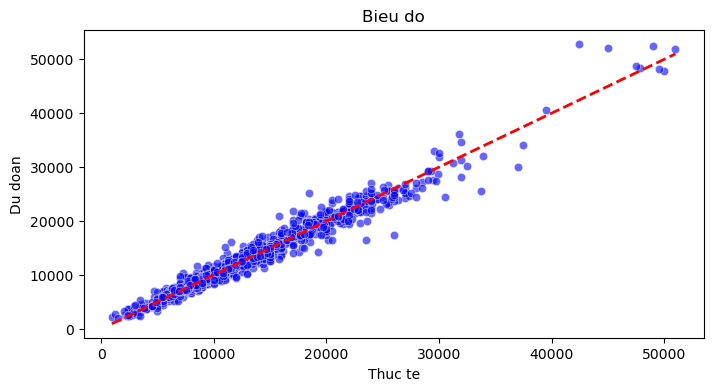

In [114]:
plt.figure(figsize=(8,4))
sns.scatterplot(x=y_test, y=y_pred.flatten(), color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Danh gia chuan xac')
plt.xlabel('Thuc te')
plt.ylabel('Du doan')
plt.title('Bieu do')
plt.show()